In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv("spam.csv", encoding="latin-1")

In [4]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [6]:
data['Category']=data['Category'].map({'ham':0, 'spam':1})

In [7]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data['Category'].value_counts()

Category
0    4825
1     747
Name: count, dtype: int64

In [9]:
import matplotlib.pyplot as plt

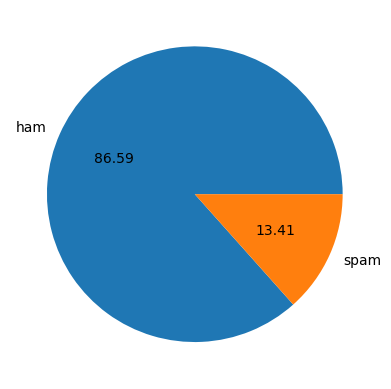

In [11]:
plt.pie(data['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [12]:
import nltk

In [13]:
data['num_characters'] = data['Message'].apply(len)

In [14]:
data['num_words'] = data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [15]:
data['num_sentences'] = data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [16]:
data.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24
1,0,Ok lar... Joking wif u oni...,29,8,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37
3,0,U dun say so early hor... U c already then say...,49,13,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15


In [17]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.494616,18.812635,18.812635
std,59.998745,13.849814,13.849814
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,9.000000
50%,61.000000,15.000000,15.000000
75%,122.000000,27.000000,27.000000
max,910.000000,220.000000,220.000000


In [18]:
#ham
data[data['Category'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.524767,17.409741,17.409741
std,58.453847,14.113090,14.113090
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,8.000000
50%,52.000000,13.000000,13.000000
75%,93.000000,22.000000,22.000000
max,910.000000,220.000000,220.000000


In [19]:
#spam
data[data['Category'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.432396,27.874163,27.874163
std,30.105608,7.036878,7.036878
min,7.000000,2.000000,2.000000
25%,133.000000,25.000000,25.000000
50%,149.000000,29.000000,29.000000
75%,157.000000,32.000000,32.000000
max,224.000000,46.000000,46.000000


In [20]:
import seaborn as sns

In [21]:
def transform_Message(Message):
    Message = Message.lower()
    Message = nltk.word_tokenize(Message)

    y = []
    for i in Message:
        if i.isalnum():
           y.append(i)

    Message = y[:]
    y.clear()

    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    Message = y[:]
    y.clear()

    for i in Message:
        y.append(ps.stem(i))

    return " ".join(y)

In [25]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [26]:
import nltk
from nltk.corpus import stopwords
import string

In [27]:
data['transformed_Message'] = data['Message'].apply(transform_Message)

In [31]:
pip install wordcloud

  Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.


In [32]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [33]:
spam_wc = wc.generate(data[data['Category'] == 1]['transformed_Message'].str.cat(sep=" "))

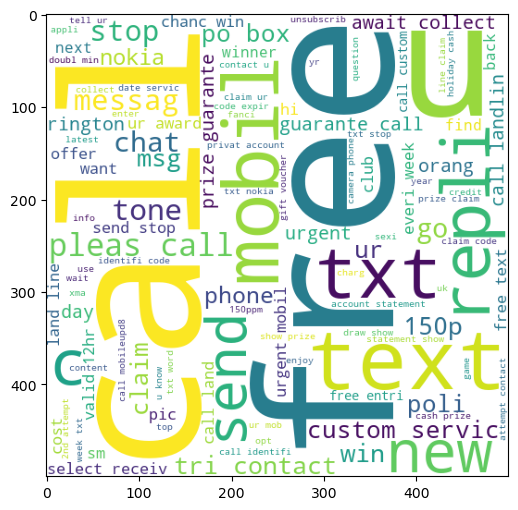

In [34]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [35]:
ham_wc = wc.generate(data[data['Category'] == 0]['transformed_Message'].str.cat(sep=" "))

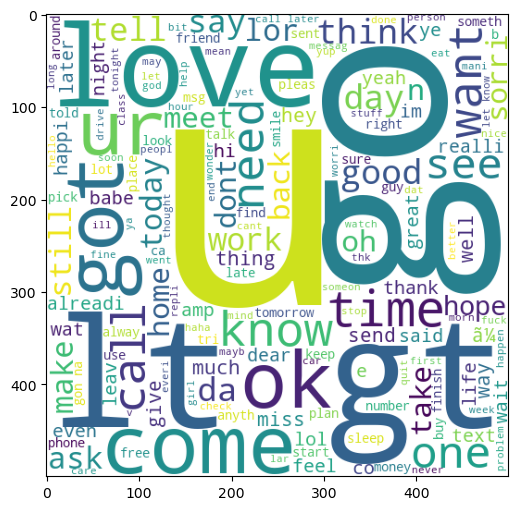

In [36]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [38]:
data.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah think goe usf live around though


In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X=data['Message']
y=data['Category']

In [42]:
X.shape

(5572,)

In [43]:
y.shape

(5572,)

In [44]:
data.isnull().sum()

Category               0
Message                0
num_characters         0
num_words              0
num_sentences          0
transformed_Message    0
dtype: int64

In [45]:
cv=CountVectorizer()

In [46]:
X=cv.fit_transform(X)

In [47]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [48]:
X_train.shape

(4457, 8745)

In [49]:
X_test.shape

(1115, 8745)

In [50]:
from sklearn.naive_bayes import MultinomialNB

In [51]:
model=MultinomialNB()

In [52]:
model.fit(X_train, y_train)

MultinomialNB()

In [53]:
model.score(X_train, y_train)

0.9939421135292797

In [54]:
model.score(X_test, y_test)

0.9856502242152466

In [55]:
msg="You Won 500$"
data = [msg]
vect = cv.transform(data).toarray()
my_prediction = model.predict(vect)

In [56]:
vect

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
import pickle
pickle.dump(model,open('spam123.pkl','wb'))
#model1 = pickle.load(open('spam123.pkl', 'rb'))

In [58]:
import pickle
pickle.dump(cv,open('vec123.pkl','wb'))
#model1 = pickle.load(open('spam123.pkl', 'rb'))